In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
titanic_d = pd.read_csv(r"D:\Python\ML projects\12. Titanic survival\train.csv")

In [4]:
titanic_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_d.shape

(891, 12)

In [7]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Columns with missing values:

Age  
Cabin  
Embarked

In [9]:
titanic_d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Dropping Cabin kyunkin bohot zyada hai

titanic_d = titanic_d.drop('Cabin',axis=1)

In [15]:
# couldn't drop age column, hence filling it with mean 

titanic_d['Age'].fillna(titanic_d['Age'].mean(),inplace=True)

In [16]:
titanic_d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# Finding mode for Embarked column 

print(titanic_d['Embarked'].mode())

0    S
dtype: object


In [18]:

print(titanic_d['Embarked'].mode()[0])

S


In [20]:
# Replacing with mode value

titanic_d['Embarked'].fillna(titanic_d['Embarked'].mode()[0], inplace=True)

In [21]:
titanic_d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [25]:
titanic_d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic_d['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

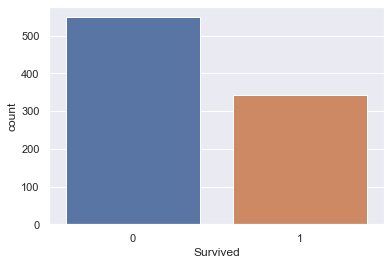

In [29]:
sns.countplot(x='Survived',data= titanic_d)

<AxesSubplot:xlabel='Sex', ylabel='count'>

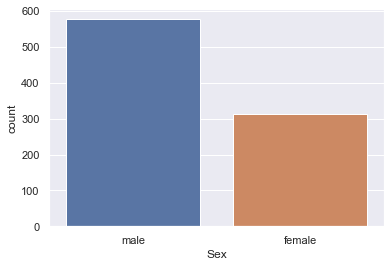

In [30]:
sns.countplot(x='Sex',data= titanic_d)

<AxesSubplot:xlabel='Sex', ylabel='count'>

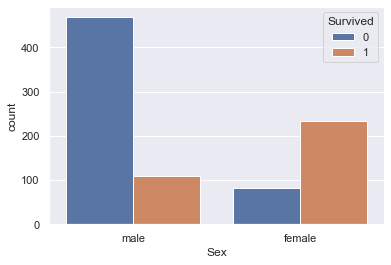

In [31]:
# Comparing Sex with respect to Survived

sns.countplot(x='Sex',hue='Survived',data= titanic_d)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

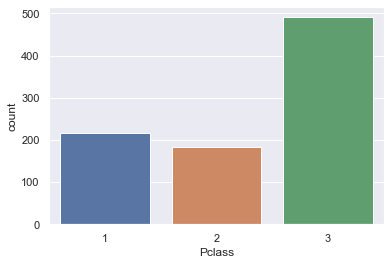

In [32]:
sns.countplot(x='Pclass',data= titanic_d)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

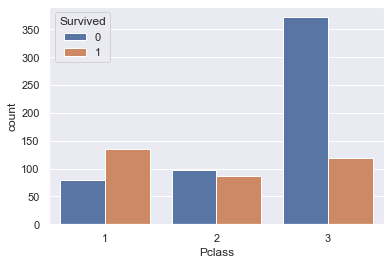

In [33]:
sns.countplot(x='Pclass',hue='Survived',data= titanic_d)

In [34]:
correlation = titanic_d.corr()

<AxesSubplot:>

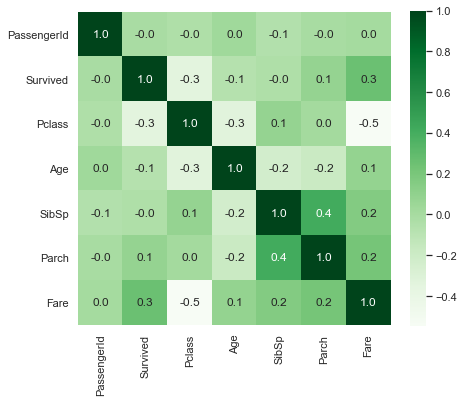

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, cbar_kws={'shrink':.83}, square=True, cmap='Greens', annot=True, fmt='.1f')

#### Replacing Categorical values 

In [54]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Categorical Values:  
    Sex  
    Embarked  
    Name(not required, remove it)  

In [58]:
titanic_d['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
titanic_d.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

#### Sex:
Male:0  
Female:1  

#### Embarked:
S:0  
C:1  
Q:2

In [61]:
titanic_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [63]:
x = titanic_d.drop(columns=['Name','Ticket','PassengerId','Survived'], axis=1)
y = titanic_d['Survived']

In [66]:
print(x,y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)

In [65]:
model = LogisticRegression()

In [67]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predict_train = model.predict(x_train)
acc_train = accuracy_score(y_train, predict_train)

In [73]:
print(acc_train)

0.8202247191011236


In [71]:
predict_test = model.predict(x_test)
acc_test = accuracy_score(y_test, predict_test)

In [74]:
print(acc_test)

0.770949720670391


In [75]:
titanic_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [82]:
# Predictive System

input_d = (1,1,38,1,0,71.2833,1)
input_d = np.asarray(input_d)
input_d = input_d.reshape(1,-1)

prediction = model.predict(input_d)

print(model.predict(input_d))

if prediction[0]==1:
    print('Survived')
else:
    print('Jack Remembers')

[1]
Survived
